#  Métodos adaptativos

## Runge–Kutta adaptativo

Para construir un par de métodos de Runge–Kutta **embebidos**, se consideran dos aproximaciones
$$y_1 \quad\text{y}\quad \tilde y_1,$$
que **usan los mismos valores de función** $k_j = f(x_0 + c_j h, y_0 + h \sum_{i<j} a_{ji} k_i)$, 
pero combinan estos $k_j$ con **pesos distintos** $b_j$ y $\tilde b_j$.

De esta forma, ambos métodos comparten la misma matriz $A=(a_{ij})$ y los mismos puntos intermedios $c_j$, 
y sólo difieren en los coeficientes de combinación final.  
El esquema de coeficientes se representa así:

$$
\begin{array}{c|cccc}
0 \\[3pt]
c_2 & a_{21} \\[3pt]
c_3 & a_{31} & a_{32} \\[3pt]
\vdots & \vdots & \vdots & \ddots \\[3pt]
c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} \\[3pt]
\hline
 & b_1 & b_2 & \cdots & b_s \\[3pt]
 & \tilde b_1 & \tilde b_2 & \cdots & \tilde b_s
\end{array}
$$

Los dos métodos quedan definidos como:

$$
y_1 = y_0 + h \sum_{j=1}^s b_j k_j, \qquad 
\tilde y_1 = y_0 + h \sum_{j=1}^s \tilde b_j k_j.
$$

El método con pesos $b_j$ tiene **orden $p$**, mientras que el embebido (con pesos $\tilde b_j$) tiene **orden $\tilde p$**, 
usualmente $\tilde p = p - 1$ o $\tilde p = p + 1$.

La idea central es que la diferencia $y_1 - \tilde y_1$ sirve como una **estimación del error local**, 
la cual puede emplearse para **ajustar el tamaño de paso** $h$ sin necesidad de evaluaciones adicionales de la función $f$.


### Método de Fehlberg 4(5)

Una de las fórmulas embebidas más populares es la construida por **Fehlberg (1969)**, 
que combina un método de **orden 5** con un estimador embebido de **orden 4**.  
Este esquema es la base de muchos integradores adaptativos modernos, como el **RKF45** (*Runge–Kutta–Fehlberg 4(5)*).

Ambas aproximaciones, $y_1$ (orden 4) y $\hat y_1$ (orden 5), usan las **mismas evaluaciones de función** $k_j$, 
por lo que el costo adicional del estimador de error es mínimo.  
La diferencia $y_1 - \hat y_1$ se emplea para estimar el **error local** y ajustar automáticamente el paso $h$.

La tabla de Butcher correspondiente es:

$$
\begin{array}{c|cccccc}
0 \\[3pt]
\frac{1}{4} & \frac{1}{4} \\[3pt]
\frac{3}{8} & \frac{3}{32} & \frac{9}{32} \\[3pt]
\frac{12}{13} & \frac{1932}{2197} & -\frac{7200}{2197} & \frac{7296}{2197} \\[3pt]
1 & \frac{439}{216} & -8 & \frac{3680}{513} & -\frac{845}{4104} \\[3pt]
\frac{1}{2} & -\frac{8}{27} & 2 & -\frac{3544}{2565} & \frac{1859}{4104} & -\frac{11}{40} \\[3pt]
\hline
 & \frac{25}{216} & 0 & \frac{1408}{2565} & \frac{2197}{4104} & -\frac{1}{5} & 0 \\[3pt]
 & \frac{16}{135} & 0 & \frac{6656}{12825} & \frac{28561}{56430} & -\frac{9}{50} & \frac{2}{55}
\end{array}
\tag{Fehlberg 4(5)}
$$

Aquí, la primera fila de coeficientes $b_j$ (asociada a $y_1$) define la **aproximación de orden 4**, 
mientras que la segunda fila $\hat b_j$ (asociada a $\hat y_1$) corresponde al **orden 5**.  
El error local estimado es:

$$
E = y_1 - \hat y_1,
$$



### Método de Cash–Karp 5(4)

El método **Cash–Karp (1990)** mantiene la misma idea de una **fórmula embebida** con dos soluciones de distinto orden que usan las mismas evaluaciones $k_j$, 
pero optimiza los coeficientes para obtener **mejores propiedades de estabilidad y error**.  

El par embebido tiene orden **5(4)**:  
- la solución principal $y_1$ es de **orden 5**,  
- la embebida $\hat y_1$ (de menor orden) sirve como **estimador de error**.

Su tabla de Butcher es:

$$
\begin{array}{c|cccccc}
0 \\[3pt]
\frac{1}{5} & \frac{1}{5} \\[3pt]
\frac{3}{10} & \frac{3}{40} & \frac{9}{40} \\[3pt]
\frac{3}{5} & \frac{3}{10} & -\frac{9}{10} & \frac{6}{5} \\[3pt]
1 & -\frac{11}{54} & \frac{5}{2} & -\frac{70}{27} & \frac{35}{27} \\[3pt]
\frac{7}{8} & \frac{1631}{55296} & \frac{175}{512} & \frac{575}{13824} & \frac{44275}{110592} & \frac{253}{4096} \\[3pt]
\hline
 & \frac{37}{378} & 0 & \frac{250}{621} & \frac{125}{594} & 0 & \frac{512}{1771} \\[3pt]
 & \frac{2825}{27648} & 0 & \frac{18575}{48384} & \frac{13525}{55296} & \frac{277}{14336} & \frac{1}{4}
\end{array}
\tag{Cash–Karp 4(5)}
$$

Al igual que el Fehlberg 4(5), el Cash–Karp proporciona dos aproximaciones:
$$
y_1 = y_0 + h \sum_{j=1}^{6} b_j k_j, 
\qquad 
\hat y_1 = y_0 + h \sum_{j=1}^{6} \hat b_j k_j,
$$
y la diferencia $y_1 - \hat y_1$ estima el **error local**.  

Este método es ampliamente usado por su **mayor estabilidad numérica** y porque evita los coeficientes negativos grandes que aparecen en el Fehlberg, lo que reduce la cancelación numérica en problemas rígidos moderados.  


### Método de Dormand–Prince 5(4)

El método **Dormand–Prince (1980)** es una de las fórmulas embebidas más utilizadas actualmente.  
Se trata de un par **5(4)**, es decir:
- el método principal $y_1$ tiene **orden 5**,  
- la fórmula embebida $\hat y_1$ tiene **orden 4**, usada como **estimador de error**.

Su diseño mejora el método de **Cash–Karp** optimizando los coeficientes para **minimizar el error global** en la solución de orden 5, en lugar del error del estimador.  
Esto lo hace más eficiente para integraciones largas o problemas con error acumulativo.

La tabla de Butcher del método Dormand–Prince es:

$$
\begin{array}{c|ccccccc}
0 \\[3pt]
\frac{1}{5} & \frac{1}{5} \\[3pt]
\frac{3}{10} & \frac{3}{40} & \frac{9}{40} \\[3pt]
\frac{4}{5} & \frac{44}{45} & -\frac{56}{15} & \frac{32}{9} \\[3pt]
\frac{8}{9} & \frac{19372}{6561} & -\frac{25360}{2187} & \frac{64448}{6561} & -\frac{212}{729} \\[3pt]
1 & \frac{9017}{3168} & -\frac{355}{33} & \frac{46732}{5247} & \frac{49}{176} & -\frac{5103}{18656} \\[3pt]
1 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} \\[3pt]
\hline
 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} & 0 \\[3pt]
 & \frac{5179}{57600} & 0 & \frac{7571}{16695} & \frac{393}{640} & -\frac{92097}{339200} & \frac{187}{2100} & \frac{1}{40}
\end{array}
\tag{Dormand–Prince 5(4)}
$$

Las dos últimas filas corresponden a los coeficientes $b_j$ (orden 5) y $\hat b_j$ (orden 4), respectivamente.  
Ambas fórmulas usan los mismos valores de función $k_j$, por lo que el costo computacional adicional es mínimo.



### Tolerancias absolutas (`Atol`) y relativas (`Rtol`) 

Los métodos adaptativos controlan el **error local** normalizándolo componente a componente con una escala que combina una **tolerancia absoluta** y una **tolerancia relativa**. Esta combinación hace que el criterio de aceptación sea **coherente** sin importar si la variable es muy pequeña o muy grande.

#### Tolerancia absoluta
- `Atol` fija un **umbral absoluto** para el error permitido por componente.
- Es crucial cuando la solución está cerca de cero o tiene magnitudes pequeñas: en ese régimen, los errores relativos serían engañosos (dividir entre números cercanos a 0 hace que “el error relativo” explote).
- Interpretación: “Acepto errores de hasta $Atol$ en valor absoluto, sin importar la escala de la variable.”

>Ejemplo:
>Si estás integrando una variable que vale alrededor de 0.001, un error de 0.0001 podría ser aceptable.
>Si pones `Atol = 1e-6`, entonces el integrador busca que el error no sea mayor que 10⁻⁶ en valor absoluto, sin importar la magnitud de la variable.

**Cuándo domina `Atol`:** cuando $|y_i|$ es pequeño. En este caso, el control del paso evitará refinamientos inútiles si ya estamos por debajo de ese piso absoluto.


#### Tolerancia relativa
- `Rtol` fija un **umbral relativo**: el error permitido crece con la magnitud de la variable.
- Es el mecanismo adecuado cuando la solución es grande o cambia de escala, porque impone un porcentaje de error “aceptable”.

>Por ejemplo, si la variable vale $100$ y `Rtol = 1e-3`, el integrador permitirá un error de hasta `100 × 1e-3 = 0.1`.
>Pero si la variable vale $0.001$, el error permitido sería `0.001 × 1e-3 = 1e-6`.
>Eso puede ser innecesariamente exigente, por eso se combina con Atol.

**Cuándo domina `Rtol`:** cuando $|y_i|$ es grande. Entonces el método permite errores proporcionales al tamaño de $y_i$, evitando pasos innecesariamente pequeños cuando la magnitud crece.


#### ¿Cómo se combinan `Atol` y `Rtol`?
Para cada componente $i$, se construye una **escala de normalización**:
$$
sc_i \;=\; \text{Atol}_i \;+\; \max\!\big(|y_{0,i}|,\,|y_{1,i}|\big)\,\text{Rtol}_i.
$$

- Si $|y_i|$ es pequeño, $sc_i \approx \text{Atol}_i$.
- Si $|y_i|$ es grande, $sc_i \approx \max(|y_{0,i}|,|y_{1,i}|)\,\text{Rtol}_i$.

### ¿Cómo se usa esta escala?

Después de un paso, el método embebido calcula **dos soluciones**:una de **orden alto** ($y_1$) y otra de **orden bajo** ($\tilde y_1$).  

La diferencia entre ellas:  

$$
E = y_1 - \tilde y_1
$$

es una **estimación del error local**.


Para cada componente $i$ del vector solución, se calcula el **error relativo normalizado** usando la escala combinada de tolerancias:

$$
\varepsilon_i = \frac{|E_i|}{sc_i},
$$

donde $sc_i = \text{Atol}_i + \max(|y_{0,i}|, |y_{1,i}|)\,\text{Rtol}_i$ es la referencia de tolerancia para cada variable.

Finalmente, se combina toda la información en una **medida escalar del error total**:

$$
\text{err} = 
\left(
\frac{1}{n}
\sum_i 
\varepsilon_i^2
\right)^{1/2}.
$$

Esta cantidad $\text{err}$ se usa como **criterio de aceptación del paso**:
- Si $\text{err} \le 1$, el paso se acepta (el error está dentro de las tolerancias).  
- Si $\text{err} > 1$, el paso se rechaza y se repite con un tamaño de paso más pequeño.

Así, la escala $(sc_i)$ permite que el método mida los errores de manera **uniforme y coherente**, incluso cuando las variables tienen magnitudes muy distintas.

#### Recomendaciones prácticas
- Usa **ambas**: fijar solo `Rtol` puede forzar refinamientos absurdos cerca de cero; fijar solo `Atol` puede ser demasiado laxo cuando la solución crece.
- Guías típicas: `Rtol` en $10^{-3} \text{ a } 10^{-6}$ según la precisión deseada; `Atol` acorde a la escala física mínima relevante (por ejemplo, $10^{-8}$ si valores de interés bajan a $10^{-6}$).

#### Conclusiónes prácticas
- `Atol` protege el control de error **cerca de cero**; `Rtol` lo hace **a gran escala**.
- Ajustar ambos permite que el integrador use **pocos** pasos donde el problema es fácil y **muchos** donde es difícil, manteniendo un **equilibrio óptimo** entre precisión y costo.


### Cálculo del paso óptimo a partir del error estimado

Una vez calculado el error normalizado $\text{err}$, el método adaptativo lo compara con el valor 1 para decidir si el paso actual es adecuado y, en caso contrario, **ajustar el tamaño del paso** de manera óptima.

#### Comportamiento del error local

En los métodos embebidos, el error local cumple una relación asintótica de la forma:

$$
\text{err} \approx C \, h^{q+1},
$$

donde:
- $C$ es una constante que depende del problema y del método,
- $h$ es el tamaño de paso actual,
- $q = \min(p, \tilde p)$ es el **orden del estimador de error** (por ejemplo, $q=4$ en un método 5(4)).

Esta relación indica que, al reducir el paso $h$, el error decrece proporcionalmente a una potencia $h^{q+1}$.


####  Derivación del paso óptimo

El objetivo del control adaptativo es mantener el error alrededor de 1 (es decir, dentro de las tolerancias).  
Si el error obtenido fue $\text{err}$, el paso que produciría un error ≈ 1 puede estimarse imponiendo:

$$
1 \approx C \, h_{\text{opt}}^{q+1}.
$$

Dividiendo esta ecuación entre la expresión para $\text{err}$, se elimina la constante $C$:

$$
\frac{1}{\text{err}} \approx \left( \frac{h_{\text{opt}}}{h} \right)^{q+1}.
$$

De donde se despeja el **nuevo tamaño de paso óptimo**:

$$
h_{\text{opt}} = h \, (1 / \text{err})^{1 / (q+1)}.
$$

#### Interpretación

- Si $\text{err} < 1$: el paso actual fue **demasiado pequeño**, y $h_{\text{opt}} > h$ → se **aumenta** el paso.
- Si $\text{err} > 1$: el paso fue **demasiado grande**, y $h_{\text{opt}} < h$ → se **reduce** el paso.
- Si $\text{err} \approx 1$: el paso fue **adecuado**, y $h_{\text{opt}} \approx h$.


#### Conclusión

La ecuación

$$
h_{\text{opt}} = h \, (1 / \text{err})^{1 / (q+1)}
$$

es la **regla fundamental de ajuste adaptativo**.  
Permite adaptar el tamaño de paso automáticamente, garantizando que el error se mantenga controlado con el **mínimo número de evaluaciones de la función**.


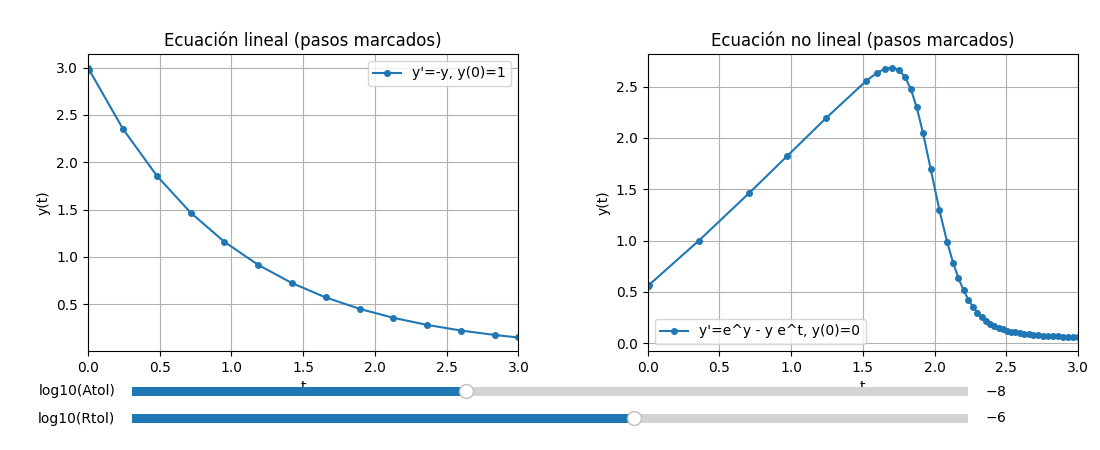

In [28]:
# -*- coding: utf-8 -*-
"""
Demostración: efecto de Atol y Rtol en métodos adaptativos.
Cada aproximación se marca con un punto ('o') para visualizar los pasos aceptados.
Ecuaciones:
  1) y' = -y, y(0)=1
  2) y' = exp(y) - t*exp(t), y(0)=0
Integrador: RKF45 (Fehlberg 5(4)) sin factores de seguridad.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# -------------------------------
# Coeficientes RKF45 (Fehlberg 5(4))
# -------------------------------
A = np.array([
    [0, 0, 0, 0, 0, 0],
    [1/4, 0, 0, 0, 0, 0],
    [3/32, 9/32, 0, 0, 0, 0],
    [1932/2197, -7200/2197, 7296/2197, 0, 0, 0],
    [439/216, -8, 3680/513, -845/4104, 0, 0],
    [-8/27, 2, -3544/2565, 1859/4104, -11/40, 0]
], dtype=float)
c = np.array([0, 1/4, 3/8, 12/13, 1, 1/2], dtype=float)
b5 = np.array([16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55], dtype=float)  # orden 5 (principal)
b4 = np.array([25/216, 0, 1408/2565, 2197/4104, -1/5, 0], dtype=float)         # orden 4 (embebida)

def rkf45_un_paso(f, t, y, h):
    """Un paso de RKF45. Retorna (y5, y4)."""
    k = np.zeros(6, dtype=float)
    k[0] = f(t, y)
    k[1] = f(t + c[1]*h, y + h*(A[1,0]*k[0]))
    k[2] = f(t + c[2]*h, y + h*(A[2,0]*k[0] + A[2,1]*k[1]))
    k[3] = f(t + c[3]*h, y + h*(A[3,0]*k[0] + A[3,1]*k[1] + A[3,2]*k[2]))
    k[4] = f(t + c[4]*h, y + h*(A[4,0]*k[0] + A[4,1]*k[1] + A[4,2]*k[2] + A[4,3]*k[3]))
    k[5] = f(t + c[5]*h, y + h*(A[5,0]*k[0] + A[5,1]*k[1] + A[5,2]*k[2] + A[5,3]*k[3] + A[5,4]*k[4]))
    y5 = y + h*np.dot(b5, k)  # solución principal (orden 5)
    y4 = y + h*np.dot(b4, k)  # embebida (orden 4) para estimar error
    return y5, y4

def integrar_adaptativo_scalar(f, t0, y0, t1, atol, rtol, h0=1e-2, q=4, hmin=1e-12, hmax=0.5):
    """
    Integración adaptativa (escalar) con RKF45, SIN factores de seguridad.
    Devuelve todos los pasos aceptados.
    """
    t = t0
    y = float(y0)
    h = h0
    ts = [t]
    ys = [y]
    while t < t1:
        if h < hmin: h = hmin
        if h > hmax: h = min(hmax, t1 - t)
        if t + h > t1: h = t1 - t

        y5, y4 = rkf45_un_paso(f, t, y, h)
        sc = atol + max(abs(y), abs(y5)) * rtol
        if sc <= 0: sc = 1.0
        err = abs(y5 - y4) / sc

        if (err <= 1.0) or (h <= hmin*1.0001):
            # aceptar paso
            t += h
            y = y5
            ts.append(t)
            ys.append(y)
            if err == 0.0:
                h = min(hmax, 2.0*h)
            else:
                h = h * (1.0/err)**(1.0/(q+1.0))
        else:
            # rechazar paso
            h = h * (1.0/err)**(1.0/(q+1.0))
            if h < hmin:
                h = hmin
    return np.array(ts), np.array(ys)

# Ecuaciones
def f_lineal(t, y): return -y
def f_no_lineal(t, y): return np.exp(y) - y*np.exp(t)

# -------------------------------
# Configuración de la figura
# -------------------------------
t0, t1 = 0.0, 3.0
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.22, wspace=0.3)

(linea1,) = ax1.plot([], [], '-o', markersize=4, label="y'=-y, y(0)=1")
ax1.set_xlabel("t"); ax1.set_ylabel("y(t)"); ax1.grid(True); ax1.legend()
ax1.set_title("Ecuación lineal (pasos marcados)")

(linea2,) = ax2.plot([], [], '-o', markersize=4, label="y'=e^y - y e^t, y(0)=0")
ax2.set_xlabel("t"); ax2.set_ylabel("y(t)"); ax2.grid(True); ax2.legend()
ax2.set_title("Ecuación no lineal (pasos marcados)")

# Sliders
ax_atol = plt.axes([0.12, 0.11, 0.76, 0.04])
ax_rtol = plt.axes([0.12, 0.05, 0.76, 0.04])

slider_atol = Slider(ax_atol, "log10(Atol)", -12.0, -2.0, valinit=-8.0, valstep=0.5)
slider_rtol = Slider(ax_rtol, "log10(Rtol)", -12.0, -2.0, valinit=-6.0, valstep=0.5)

def actualizar(_=None):
    atol = 10.0**slider_atol.val
    rtol = 10.0**slider_rtol.val

    ts1, ys1 = integrar_adaptativo_scalar(f_lineal, t0, 3.0, t1, atol, rtol, h0=1e-2)
    ts2, ys2 = integrar_adaptativo_scalar(f_no_lineal, t0, 0.556, t1, atol, rtol, h0=1e-3)

    linea1.set_data(ts1, ys1)
    linea2.set_data(ts2, ys2)

    # Actualiza límites
    for ax, ts, ys in [(ax1, ts1, ys1), (ax2, ts2, ys2)]:
        ax.set_xlim(ts.min(), ts.max())
        ymin, ymax = ys.min(), ys.max()
        margen = 0.05 * (ymax - ymin + 1e-12)
        ax.set_ylim(ymin - margen, ymax + margen)

    fig.canvas.draw_idle()

slider_atol.on_changed(actualizar)
slider_rtol.on_changed(actualizar)

actualizar()
plt.show()


#### Ejemplo de **gráficas** de las aproximaciones al variar `Atol` y `Rtol`

En el demo con dos ecuaciones,
- **E1:** $y'=-y, \; y(0)=1$, solución suave y decreciente;
- **E2:** $y'=e^y - y\,e^t, \; y(0)=0$, puede crecer rápido y volverse más “difícil”.

Cada **marcador** en la curva es un **punto aceptado** (final de un paso). Más marcadores ⇒ pasos más cortos ⇒ mayor costo.

**Al bajar `Rtol` (más estricto, p. ej. $10^{-6} \to 10^{-8}$):**
- En regiones donde $|y|$ no es pequeño, el término relativo domina y el método **reduce $h$** para mantener el porcentaje de error; verás **más marcadores** (más densos).
- Efecto muy visible en **E2** cuando $y$ crece: la curva tendrá puntos más cercanos (pasos más pequeños).

**Al subir `Rtol` (más laxo, p. ej. $10^{-6} \to 10^{-3}$):**
- Se permite mayor error relativo, por lo que $h$ **crece** y los marcadores se **espacian** (menos pasos).
- En **E1**, como $y$ decae y su escala se reduce, este efecto puede volverse secundario frente a `Atol` (ver siguiente punto).

**Al bajar `Atol` (más estricto, p. ej. $10^{-6} \to 10^{-10}$):**
- En zonas donde $|y|$ es pequeño (sobre todo en **E1** conforme $t$ crece), el piso absoluto baja y el método **refina** para respetarlo: verás **más marcadores** al final del intervalo.
- Evita sobre-refinar cerca de cero con un `Atol` coherente con la resolución que realmente necesitas.

**Al subir `Atol` (más laxo, p. ej. $10^{-8} \to 10^{-4}$):**
- Cuando $|y|$ es pequeño, el control absoluto se vuelve permisivo y el integrador **aumenta $h$**: los marcadores se **espacian** en esas regiones.
- En **E2**, `Atol` suele impactar menos que `Rtol` en las zonas donde $y$ crece (ahí manda el término relativo).

**Reglas de dedo visuales en ambas gráficas:**
- **Mayor densidad de marcadores** = el integrador detecta mayor curvatura/variación o tolerancias más estrictas ⇒ **pasos más pequeños**.
- **Menor densidad de marcadores** = tolerancias más laxas o dinámica suave ⇒ **pasos más grandes**.
- En **E1** (suave y decaimiento): el efecto de `Atol` se nota sobre todo **al final** (cuando $y$ es pequeño).
- En **E2** (potencialmente crecim. rápido): el efecto de `Rtol` se nota sobre todo **en la zona de crecimiento** (cuando $y$ es grande y el término relativo domina).
